In [ ]:
' !pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 95% 155M/163M [00:00<00:00, 196MB/s]
100% 163M/163M [00:00<00:00, 190MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  drive  face-mask-dataset.zip  kaggle.json  sample_data


**Importing Libraries**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3541.jpg', 'with_mask_3418.jpg', 'with_mask_1229.jpg', 'with_mask_2828.jpg', 'with_mask_1048.jpg']
['with_mask_3539.jpg', 'with_mask_1146.jpg', 'with_mask_3151.jpg', 'with_mask_928.jpg', 'with_mask_285.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_576.jpg', 'without_mask_841.jpg', 'without_mask_3355.jpg', 'without_mask_844.jpg', 'without_mask_3727.jpg']
['without_mask_2799.jpg', 'without_mask_355.jpg', 'without_mask_3639.jpg', 'without_mask_2579.jpg', 'without_mask_3828.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask --> 1

without mask --> 0

In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

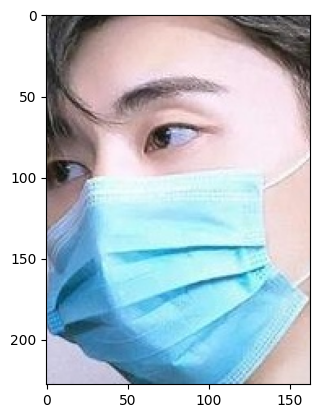

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

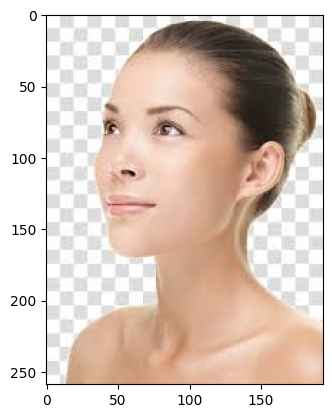

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images
2. Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[ 71,  72,   3],
        [ 81,  83,   9],
        [ 89,  87,   6],
        ...,
        [175, 205, 234],
        [173, 203, 233],
        [170, 201, 232]],

       [[ 73,  73,   3],
        [ 76,  76,   4],
        [ 86,  83,   3],
        ...,
        [171, 204, 236],
        [170, 202, 235],
        [167, 200, 233]],

       [[ 80,  79,   5],
        [ 77,  74,   0],
        [ 86,  82,   3],
        ...,
        [161, 200, 234],
        [157, 196, 233],
        [154, 195, 232]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
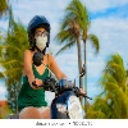

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[252, 252, 254],
        [253, 253, 253],
        [254, 254, 253],
        ...,
        [254, 254, 254],
        [253, 253, 253],
        [253, 253, 253]],

       [[253, 253, 253],
        [253, 253, 253],
        [250, 250, 250],
        ...,
        [251, 251, 251],
        [252, 252, 252],
        [253, 253, 253]],

       [[254, 254, 253],
        [254, 254, 254],
        [197, 197, 198],
        ...,
        [234, 234, 234],
        [255, 255, 255],
        [254, 254, 254]],

       ...,

       [[253, 254, 250],
        [255, 255, 255],
        [175, 176, 195],
        ...,
        [223, 220, 230],
        [255, 255, 255],
        [253, 254, 251]],

       [[253, 254, 250],
        [255, 255, 255],
        [186, 186, 204],
        ...,
        [224, 221, 230],
        [255, 255, 255],
        [254, 254, 251]],

       [[252, 253, 250],
        [255, 255, 255],
        [183, 183, 203],
        ...,
        [222, 218, 229],
        [255, 255, 255],
        [253, 254, 251]]], dtype=uint8)
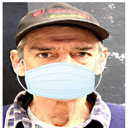

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0.98823529, 0.98823529, 0.99607843],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99607843, 0.99607843, 0.99215686],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686]],

       [[0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        [0.98039216, 0.98039216, 0.98039216],
        ...,
        [0.98431373, 0.98431373, 0.98431373],
        [0.98823529, 0.98823529, 0.98823529],
        [0.99215686, 0.99215686, 0.99215686]],

       [[0.99607843, 0.99607843, 0.99215686],
        [0.99607843, 0.99607843, 0.99607843],
        [0.77254902, 0.77254902, 0.77647059],
        ...,
        [0.91764706, 0.91764706, 0.91764706],
        [1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843]],

       ...,

       [[0.99215686, 0.99607843, 0.98039216],
        [1.        , 1.        , 1.        ],
        [0.68627451, 0

**Building a Convolutional Neural Networks (CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 136s 795ms/step - loss: 0.1436 - acc: 0.9452 - val_loss: 0.1990 - val_acc: 0.9240
Epoch 2/5
170/170 [==============================] - 125s 738ms/step - loss: 0.1068 - acc: 0.9630 - val_loss: 0.1678 - val_acc: 0.9339
Epoch 3/5
170/170 [==============================] - 125s 735ms/step - loss: 0.1054 - acc: 0.9647 - val_loss: 0.1649 - val_acc: 0.9421
Epoch 4/5
170/170 [==============================] - 127s 746ms/step - loss: 0.0837 - acc: 0.9706 - val_loss: 0.2155 - val_acc: 0.9355
Epoch 5/5
170/170 [==============================] - 120s 703ms/step - loss: 0.0797 - acc: 0.9728 - val_loss: 0.2108 - val_acc: 0.9455


In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 10s 211ms/step - loss: 0.2280 - acc: 0.9318
Test Accuracy = 0.9318332076072693


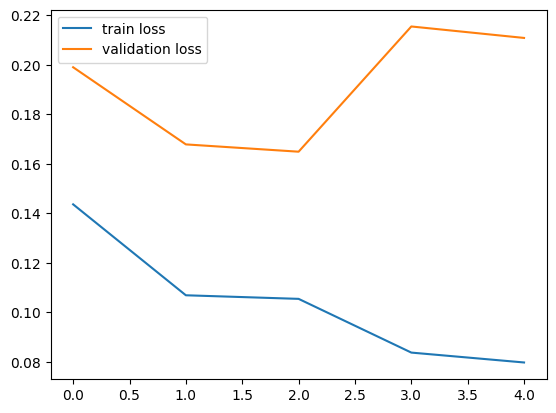

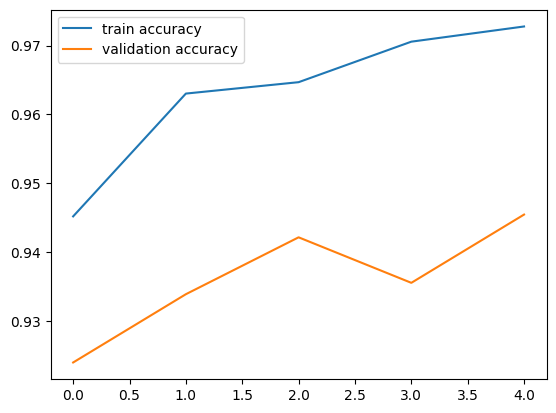

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/data/with_mask/with_mask_1.jpg


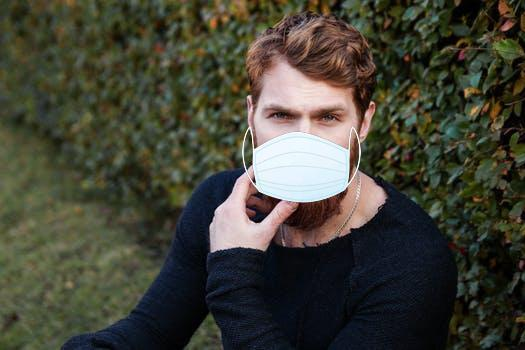

1/1 [==============================] - 0s 147ms/step
[[0.11379245 0.99227   ]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/data/without_mask/without_mask_100.jpg


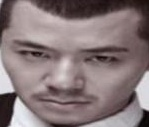

1/1 [==============================] - 0s 29ms/step
[[0.77828676 0.21335371]]
0
The person in the image is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')